In [5]:
import os
from pathlib import Path
import numpy as np
import pandas as pd
import glob 

from sklearn.model_selection import train_test_split

In [11]:
data_root = '..\\data\\MPIIFaceGazeCustom\\'

In [23]:
data_df = pd.DataFrame(columns=["filename", "pitch", "yaw", "xmin", "ymin", "bboxw", "bboxh", "gazex", "gazey", "width", "height", "gazenx", "gazeny"])

In [26]:
df_list = []
for csvfile in glob.glob(data_root + '*.csv'):
    print(csvfile)
    df_person = pd.read_csv(csvfile)
    # print(df.head())
    df_list.append(df_person)
    
print(df_list)


..\data\MPIIFaceGazeCustom\p00.csv
..\data\MPIIFaceGazeCustom\p01.csv
..\data\MPIIFaceGazeCustom\p02.csv
..\data\MPIIFaceGazeCustom\p03.csv
..\data\MPIIFaceGazeCustom\p04.csv
..\data\MPIIFaceGazeCustom\p05.csv
..\data\MPIIFaceGazeCustom\p06.csv
..\data\MPIIFaceGazeCustom\p07.csv
..\data\MPIIFaceGazeCustom\p08.csv
..\data\MPIIFaceGazeCustom\p09.csv
..\data\MPIIFaceGazeCustom\p10.csv
..\data\MPIIFaceGazeCustom\p11.csv
..\data\MPIIFaceGazeCustom\p12.csv
..\data\MPIIFaceGazeCustom\p13.csv
..\data\MPIIFaceGazeCustom\p14.csv
[      filename     pitch       yaw  xmin  ymin  bboxw  bboxh  gazex  gazey  \
0        1.jpg -0.005134 -0.325304   543   229    266    362    476    758   
1        2.jpg  0.185168 -0.175180   478   234    272    411   1078    693   
2        3.jpg -0.241779 -0.203293   536   232    279    388    126    598   
3        4.jpg -0.204767  0.013988   537   271    266    376    211     69   
4        5.jpg  0.017201 -0.222135   510   214    262    369    878    752   
...   

In [29]:
df = pd.concat(df_list, axis=0)
df.shape

(37650, 13)

In [32]:
df.head()

,filename,pitch,yaw,xmin,ymin,bboxw,bboxh,gazex,gazey,width,height,gazenx,gazeny
0,1.jpg,-0.005134,-0.325304,543,229,266,362,476,758,1280,800,0.371875,0.94750
1,2.jpg,0.185168,-0.175180,478,234,272,411,1078,693,1280,800,0.842187,0.86625
2,3.jpg,-0.241779,-0.203293,536,232,279,388,126,598,1280,800,0.098437,0.74750
3,4.jpg,-0.204767,0.013988,537,271,266,376,211,69,1280,800,0.164844,0.08625
4,5.jpg,0.017201,-0.222135,510,214,262,369,878,752,1280,800,0.685937,0.94000


In [40]:
X = df.iloc[:, 1:3].values
y = df.iloc[:, 11:].values
print(X, type(X))
print(y, type(y))

[[-0.00513378 -0.32530406]
 [ 0.18516799 -0.17517981]
 [-0.24177907 -0.20329293]
 ...
 [ 0.4026894  -0.29976488]
 [ 0.34150434 -0.11686617]
 [ 0.03546585 -0.30068047]] <class 'numpy.ndarray'>
[[0.371875   0.9475    ]
 [0.8421875  0.86625   ]
 [0.0984375  0.7475    ]
 ...
 [0.92986111 0.89      ]
 [0.94583333 0.10222222]
 [0.23888889 0.98111111]] <class 'numpy.ndarray'>


In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [144]:
print(X_train.shape, y_train.shape)

(28237, 2) (28237, 2)


In [145]:
print(X_test.shape, y_test.shape)

(9413, 2) (9413, 2)


# Random Forest Regressor

In [155]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import pickle


In [147]:
# Create an instance of Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)


In [148]:
# Fit the model to your training data
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [149]:
# Make predictions on the validation set
y_pred = rf_regressor.predict(X_test)

In [150]:
# Calculate R-squared score
r2_score_rf = r2_score(y_test, y_pred)

In [151]:
mse_rf = mean_squared_error(y_test, y_pred)
print(mse_rf)

0.04460089763185657


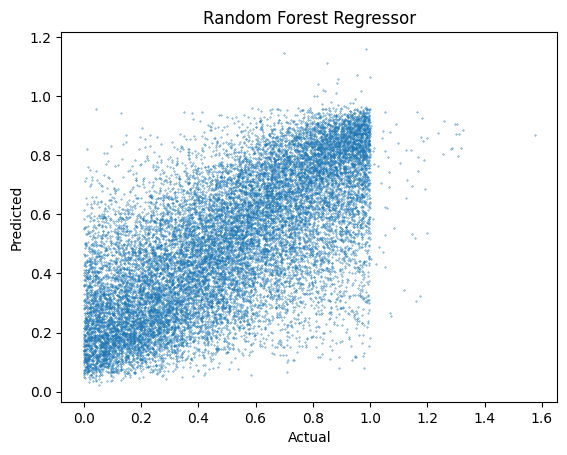

In [152]:
# Plot a graph
plt.scatter(y_test, y_pred, s=.1)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest Regressor')
plt.show()

In [156]:
# Save the Random Forest model
with open("./models/random_forest_model.pkl", "wb") as f:
    pickle.dump(rf_regressor, f)

In [175]:
# Load the Random Forest model
with open("./models/random_forest_model.pkl", "rb") as f:
    loaded_model_rf = pickle.load(f)

# Gradient Boosting Regressor (using XGBoost)

In [157]:
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import pickle

In [158]:
# Create an instance of XGBoost Regressor
xgb_regressor = xgb.XGBRegressor(n_estimators=100, random_state=42)

In [159]:
# Fit the model to your training data
xgb_regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [160]:
# Make predictions on the validation set
y_pred = xgb_regressor.predict(X_test)

In [161]:
# Calculate R-squared score
r2_score_xgb = r2_score(y_test, y_pred)
print(r2_score)

<function r2_score at 0x000002782E2A65E0>


In [162]:
mse_xgb = mean_squared_error(y_test, y_pred)
print(mse_rf)

0.04460089763185657


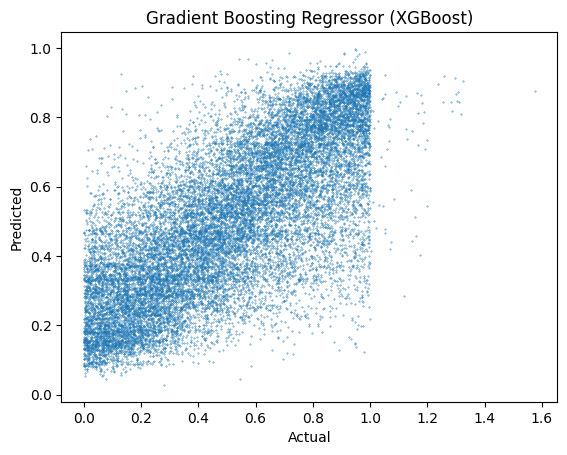

In [163]:
# Plot a graph
plt.scatter(y_test, y_pred, s=.1)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Gradient Boosting Regressor (XGBoost)')
plt.show()

In [164]:
# Save the XGB Regressor model
with open("./models/xgb_regressor_model.pkl", "wb") as f:
    pickle.dump(xgb_regressor, f)

In [174]:
# Load the XGB Regressor model
with open("./models/xgb_regressor_model.pkl", "rb") as f:
    loaded_model_xgb = pickle.load(f)

# Multi-Output Regression with Support Vector Machines (SVM)

In [165]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import pickle

In [176]:
# Create an instance of Support Vector Regression
svm_regressor = SVR()

In [177]:
# Create an instance of MultiOutputRegressor with SVM as the base estimator
multioutput_regressor = MultiOutputRegressor(svm_regressor)

In [178]:
# Fit the model to your training data
multioutput_regressor.fit(X_train, y_train)

MultiOutputRegressor(estimator=SVR())

In [179]:
# Make predictions on the validation set
y_pred = multioutput_regressor.predict(y_test)

In [180]:
# Calculate R-squared score for each output variable
r2_score_output1 = r2_score(y_test[:, 0], y_pred[:, 0])
r2_score_output2 = r2_score(y_test[:, 1], y_pred[:, 1])

In [181]:
mse_svo1 = mean_squared_error(y_test[:, 0], y_pred[:, 0])
mse_svo2 = mean_squared_error(y_test[:, 1], y_pred[:, 1])
print(mse_svo1, mse_svo2)

0.20269051322975062 0.08761536088755824


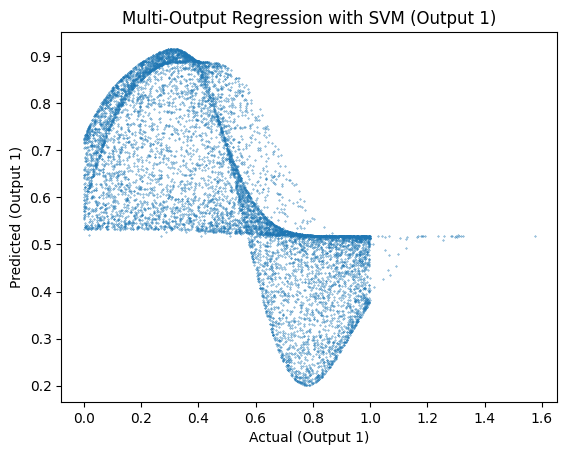

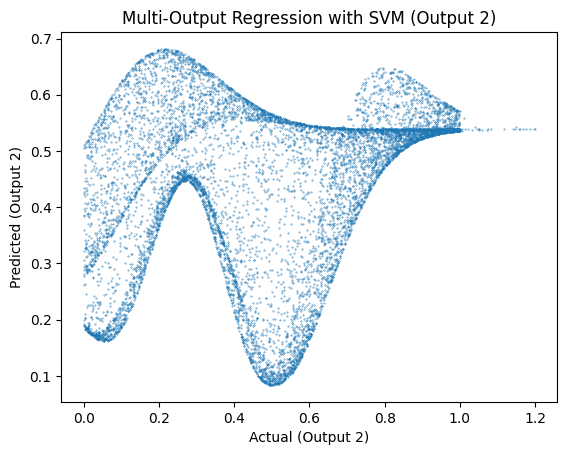

In [182]:
# Plot a graph for output variable 1
plt.scatter(y_test[:, 0], y_pred[:, 0], s=0.1)
plt.xlabel('Actual (Output 1)')
plt.ylabel('Predicted (Output 1)')
plt.title('Multi-Output Regression with SVM (Output 1)')
plt.show()

# Plot a graph for output variable 2
plt.scatter(y_test[:, 1], y_pred[:, 1], s=0.1)
plt.xlabel('Actual (Output 2)')
plt.ylabel('Predicted (Output 2)')
plt.title('Multi-Output Regression with SVM (Output 2)')
plt.show()


In [184]:
# Save the Multioutput SVR model
with open("./models/multioutput_svr_model.pkl", "wb") as f:
    pickle.dump(multioutput_regressor, f)

In [185]:
# Load the Multioutput SVR model
with open("./models/multioutput_svr_model.pkl", "rb") as f:
    loaded_model_svr = pickle.load(f)

# Neural Networks (using TensorFlow backend)

In [186]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

In [187]:
input_dim = X_train.shape[1]
print(input_dim)

2


In [188]:
# Create a sequential neural network model
model = Sequential()

# Add input and hidden layers
model.add(Dense(64, input_dim=input_dim, activation='relu'))
model.add(Dense(64, activation='relu'))

# Add output layers for each output variable
output1 = Dense(1, name='output1')(model.layers[-1].output)
output2 = Dense(1, name='output2')(model.layers[-1].output)

In [189]:
# Create a model with multiple outputs
model = tf.keras.Model(inputs=model.inputs, outputs=[output1, output2])

In [190]:
# Define the optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

In [191]:
# Compile the model
model.compile(loss='mean_squared_error', optimizer=optimizer)

In [192]:
model.fit(X_train, [y_train[:, 0], y_train[:, 1]], epochs=10, batch_size=32)


Epoch 1/10
883/883 [==============================] - 4s 4ms/step - loss: 0.0882 - output1_loss: 0.0301 - output2_loss: 0.0581
Epoch 2/10
883/883 [==============================] - 3s 3ms/step - loss: 0.0770 - output1_loss: 0.0227 - output2_loss: 0.0543
Epoch 3/10
883/883 [==============================] - 3s 3ms/step - loss: 0.0768 - output1_loss: 0.0227 - output2_loss: 0.0541
Epoch 4/10
883/883 [==============================] - 3s 3ms/step - loss: 0.0765 - output1_loss: 0.0225 - output2_loss: 0.0540
Epoch 5/10
883/883 [==============================] - 3s 3ms/step - loss: 0.0764 - output1_loss: 0.0225 - output2_loss: 0.0539
Epoch 6/10
883/883 [==============================] - 3s 3ms/step - loss: 0.0763 - output1_loss: 0.0225 - output2_loss: 0.0537
Epoch 7/10
883/883 [==============================] - 3s 3ms/step - loss: 0.0761 - output1_loss: 0.0225 - output2_loss: 0.0536
Epoch 8/10
883/883 [==============================] - 3s 3ms/step - loss: 0.0760 - output1_loss: 0.0224 - outpu

In [193]:
# Make predictions on the validation set
y_pred_output1, y_pred_output2 = model.predict(X_test)

295/295 [==============================] - 0s 1ms/step


In [194]:
# Calculate R-squared score for each output variable
r2_score_output1 = r2_score(y_test[:, 0], y_pred_output1)
r2_score_output2 = r2_score(y_test[:, 1], y_pred_output2)

In [195]:
mse_nn1 = mean_squared_error(y_test[:, 0], y_pred_output1)
mse_nn2 = mean_squared_error(y_test[:, 1], y_pred_output2)
print(mse_nn1, mse_nn2)

0.02313724197277248 0.053466948277702445


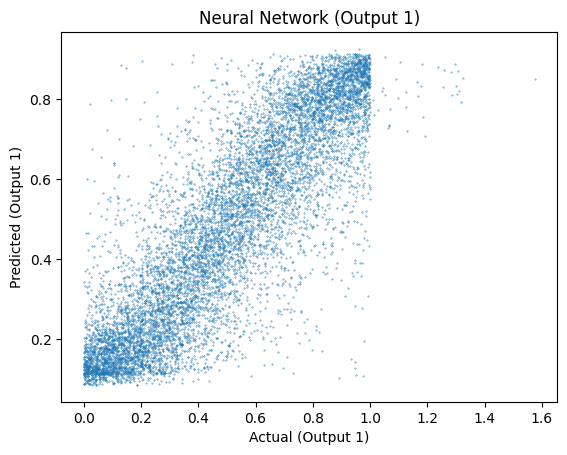

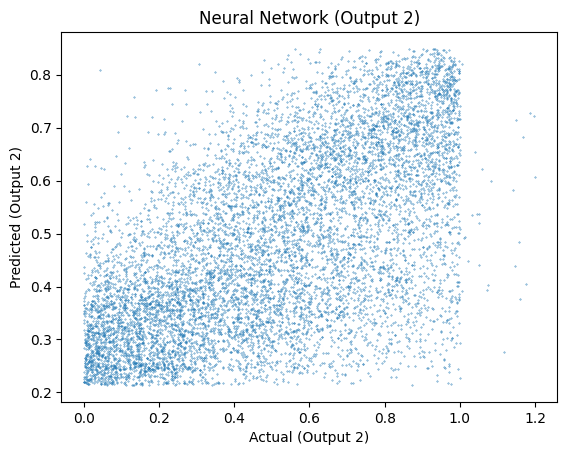

In [196]:
# Plot a graph for output variable 1
plt.scatter(y_test[:, 0], y_pred_output1, s=.1)
plt.xlabel('Actual (Output 1)')
plt.ylabel('Predicted (Output 1)')
plt.title('Neural Network (Output 1)')
plt.show()

# Plot a graph for output variable 2
plt.scatter(y_test[:, 1], y_pred_output2, s=.1)
plt.xlabel('Actual (Output 2)')
plt.ylabel('Predicted (Output 2)')
plt.title('Neural Network (Output 2)')
plt.show()


In [197]:
# Save the Neural Network model
model.save("./models/neural_network_model.h5")

In [198]:
# Load the Neural Network model
loaded_model = keras.models.load_model("./models/neural_network_model.h5")

# Multi-Output Ensemble Model with RFR, GBR, SVR

In [205]:
import numpy as np
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import pickle

In [206]:
class MultiOutputEnsemble(BaseEstimator, RegressorMixin):
    def __init__(self, estimators):
        self.estimators = estimators
    
    def fit(self, X, y):
        for estimator in self.estimators:
            estimator.fit(X, y)
        return self
    
    def predict(self, X):
        predictions = [estimator.predict(X) for estimator in self.estimators]
        return np.column_stack(predictions)


In [207]:
# Create individual models
model_rf = RandomForestRegressor()
model_gb = GradientBoostingRegressor()
model_svr = SVR()

In [208]:
# Create the ensemble model
ensemble = MultiOutputEnsemble(estimators=[model_rf, model_gb, model_svr])

In [209]:
# Train the ensemble model
ensemble.fit(X_train, y_train)

ValueError: y should be a 1d array, got an array of shape (28237, 2) instead.

In [ ]:
# Make predictions using the ensemble model
y_pred = ensemble.predict(X_test)

In [ ]:
# Calculate R-squared score for each output variable
r2_score_output1 = r2_score(y_test[:, 0], y_pred[:, 0])
r2_score_output2 = r2_score(y_test[:, 1], y_pred[:, 1])

In [ ]:
mse_ens = mean_squared_error(y_test[:, 0], y_pred[:, 0])
mse_ens = mean_squared_error(y_test[:, 1], y_pred[:, 1])
print(mse_ens, mse_ens)

In [ ]:
# Plot a graph for output variable 1
plt.scatter(y_test[:, 0], y_pred[:, 0], s=0.1)
plt.xlabel('Actual (Output 1)')
plt.ylabel('Predicted (Output 1)')
plt.title('Multi-Output Ensemble (Output 1)')
plt.show()

# Plot a graph for output variable 2
plt.scatter(y_test[:, 1], y_pred[:, 1], s=0.1)
plt.xlabel('Actual (Output 2)')
plt.ylabel('Predicted (Output 2)')
plt.title('Multi-Output Ensemble (Output 2)')
plt.show()


In [ ]:
# Save the Multioutput Ensemble model
with open("./models/multioutput_ensemble_model.pkl", "wb") as f:
    pickle.dump(multioutput_regressor, f)

In [ ]:
# Load the Multioutput Ensemble model
with open("./models/multioutput_ensemble_model.pkl", "rb") as f:
    loaded_model_svr = pickle.load(f)